In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # display figure inline in notebook
#import plotly.express as px # view the timeseries data in a slider
import seaborn as sns

#sns.set(rc={'figure.figsize':(8,5)}) # set the seaborn default figrue size
sns.set()
sns.set_style('white') #possible choices: white, dark, whitegrid, darkgrid, ticks
sns.set(rc={'figure.figsize':(11,7)}, style="white", font_scale=1.4)#style="whitegrid"
plt.rcParams["axes.labelsize"] = 16

from datetime import datetime # converting the timestamp data into datetime object
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # determining autocorrelation
from scipy import stats # detecting outliers by z score

In [2]:
SAVING_DIR = r'C:\Users\Rabbil\Documents\BDA_thesis\thesis-project\outputs\Vizualization'

DATA_PATH = r'C:\Users\Rabbil\Documents\BDA_thesis\thesis-project\data\processed\background_negative_value_processed_data.csv'
df = pd.read_csv(DATA_PATH)
df.head(4)

,date,group,spora-id,latitude,longitude,Pressure,Humidity,Temperature,NO_s,NO2_s,O3_s,CO_s,NO,NO2,O3,CO
0,2019-02-19 07:34:09,0.0,2,60.184558,24.922632,100259.0,27.889,30.55,0.025742,0.047203,0.033457,0.109408,0.734471,0.025169,0.019661,11.737139
1,2019-02-19 07:34:10,0.0,2,60.184562,24.922633,100259.0,27.886,30.56,0.025742,0.047203,0.033457,0.109408,0.734471,0.025169,0.019661,11.737139
2,2019-02-19 07:34:11,0.0,2,60.184563,24.922632,100260.0,27.876,30.56,0.025742,0.047203,0.033457,0.109408,0.734471,0.025169,0.019661,11.737139
3,2019-02-19 07:34:12,0.0,2,60.184563,24.922638,100261.0,27.876,30.57,0.025742,0.047203,0.033457,0.109408,0.734471,0.025169,0.019661,11.737139


In [3]:
# converting the timestamp data into datetime object 
df['date'] = pd.to_datetime(df['date'])
df.date.dtype

dtype('<M8[ns]')

In [4]:
# set index of date and group column
df.set_index(['date', 'group'], inplace=True)

In [5]:
# Checking the null value
df.isnull().sum()

spora-id             0
latitude             0
longitude            0
Pressure             0
Humidity             0
Temperature          0
NO_s           4690440
NO2_s          4863060
O3_s           4162320
CO_s           5254920
NO             1717920
NO2            1718460
O3             1718820
CO             1719540
dtype: int64

In [6]:
# forward filling
#Tuesday data (missing) equals to Monday data (existing) is forward filling. The opposite is backward filling
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

spora-id       0
latitude       0
longitude      0
Pressure       0
Humidity       0
Temperature    0
NO_s           0
NO2_s          0
O3_s           0
CO_s           0
NO             0
NO2            0
O3             0
CO             0
dtype: int64

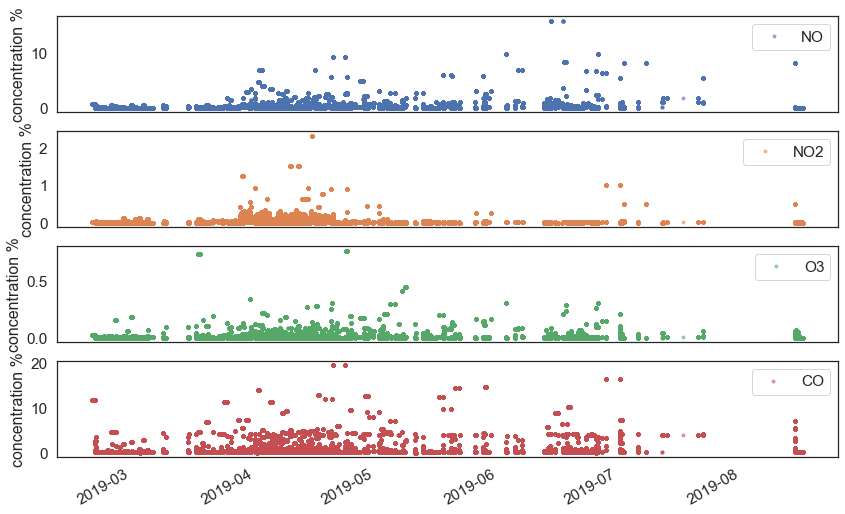

In [7]:
# plotting the variables after all processing

def pollutant_concentration_final_plot_ffill(df):
    cols_plot = ['NO', 'NO2', 'O3', 'CO']
    axes = df.reset_index('group')[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14,9), subplots=True)
    for ax in axes:
        ax.set_ylabel('concentration %')
        ax.set_xlabel('')
        
    my_path = SAVING_DIR
    my_file = 'pollutant_concentration_level_final_ffill.png'
    plt.savefig(os.path.join(my_path, my_file))
    
pollutant_concentration_final_plot_ffill(df)

In [8]:
#finding outliers by running the summary statistics on the variables.

def preprocessed_summary_statistics(df):

    desc = df.describe()
    desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
    desc.iloc[1:] = desc.iloc[1:].applymap('{:.2f}'.format)
    desc = desc.append(df.reindex(desc.columns, axis=1).agg(['skew', 'kurt']))
    
    # saving the statistics
    my_path = SAVING_DIR
    my_file = 'preprocessed_summary_statistics.xlsx'
    desc.to_excel(os.path.join(my_path, my_file))
    
    return desc

In [9]:
summary = preprocessed_summary_statistics(df)
summary

,spora-id,latitude,longitude,Pressure,Humidity,Temperature,NO_s,NO2_s,O3_s,CO_s,NO,NO2,O3,CO
count,6035760,6035760,6035760,6035760,6035760,6035760,6035760,6035760,6035760,6035760,6035760,6035760,6035760,6035760
mean,2.17,56.93,23.59,101576.98,22.64,25.75,0.12,0.08,0.01,0.13,0.12,0.01,0.00,0.14
std,0.68,13.61,5.64,1327.36,8.49,8.09,0.20,0.21,0.02,2.08,0.64,0.03,0.02,0.53
min,1.00,0.00,0.00,97668.00,8.51,3.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,60.17,24.92,100678.00,16.94,19.73,0.03,0.00,0.00,0.07,0.01,0.00,0.00,0.03
50%,2.00,60.18,24.93,101687.00,20.54,25.40,0.07,0.00,0.00,0.09,0.02,0.00,0.00,0.04
75%,3.00,60.19,24.95,102646.00,25.81,31.13,0.07,0.00,0.02,0.09,0.07,0.01,0.00,0.09
max,3.00,60.23,24.99,104266.00,85.14,51.46,3.34,1.03,0.09,139.49,15.88,2.33,0.78,19.35
skew,-0.227899,-3.943282,-3.943211,-0.472425,1.579955,0.222123,2.908888,2.526688,1.540384,63.873774,10.35106,22.298222,10.593432,11.893735
kurt,-0.83886,13.549503,13.549133,-0.382463,3.207901,-0.122121,9.015087,5.336001,1.296322,4136.847463,114.12867,1089.076772,220.547397,220.983089


In [10]:
# the skewness value should be between -1 and +1, 
# and any major deviation from this range indicates the presence of extreme values.

In [11]:
# dist plot and box plot together
# Cut the window in 2 parts

def dist_box_plot_together(df):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    #sns.boxplot(df["sepal_length"], ax=ax_box)
    svm=sns.boxplot(df.reset_index('group').resample('H').mean().O3, ax=ax_box)
    svm=sns.distplot(df.reset_index('group').resample('H').mean().O3, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

    figure= svm.get_figure()
    
    my_path = SAVING_DIR
    my_file = 'box_dist_plot_O3.png'
    figure.savefig(os.path.join(my_path, my_file))
    #figure.savefig('boxplot_distplot_NO2.png')

C:\Users\Rabbil\anaconda3\envs\thesis-deepLearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Rabbil\anaconda3\envs\thesis-deepLearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


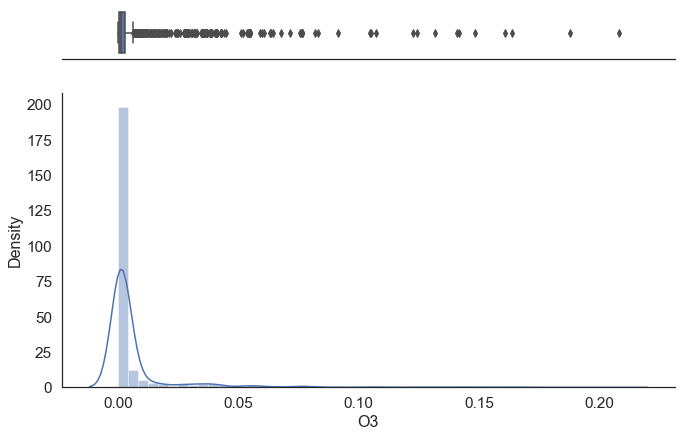

In [12]:
dist_box_plot_together(df)

In [13]:
# Replacing outlier with median
def outlier_replace(df):
    df['CO'] = np.where(df['CO'] > df['CO'].quantile(0.95), df['CO'].quantile(0.50), df['CO']) # replaces all values, which are > the 95th percentile, with the median value
    df['NO'] = np.where(df['NO'] > df['NO'].quantile(0.95), df['NO'].quantile(0.50), df['NO'])
    df['NO2'] = np.where(df['NO2'] > df['NO2'].quantile(0.95), df['NO2'].quantile(0.50), df['NO2'])
    df['O3'] = np.where(df['O3'] > df['O3'].quantile(0.95), df['O3'].quantile(0.95), df['O3'])
    df['Humidity'] = np.where(df['Humidity'] > df['Humidity'].quantile(0.95), df['Humidity'].quantile(0.50), df['Humidity'])
    df['Temperature'] = np.where(df['Temperature'] > df['Temperature'].quantile(0.95), df['Temperature'].quantile(0.50), df['Temperature'])
    
    
outlier_replace(df) 

In [14]:
# vizualization of the data after outlier replacement with median and performing resmaple
def pollutant_plot_outlier_replace(df):
    ax =df.reset_index('group').NO.resample('H').mean().fillna(df.NO.median()).plot(title='NO resampled & outlier replc', color='orange') 
    plt.tight_layout()
    
        
    my_path = SAVING_DIR
    my_file = 'NO_after_outlier_replace.png'
    plt.savefig(os.path.join(my_path, my_file))

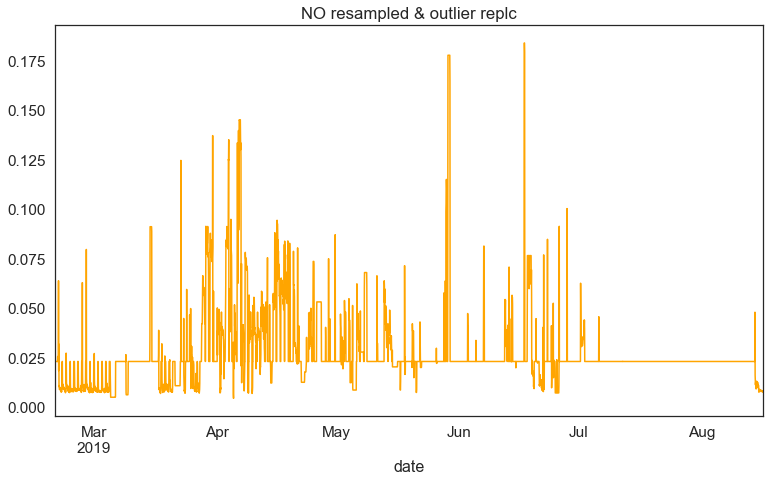

In [15]:
pollutant_plot_outlier_replace(df)

In [16]:
# Based on these plots above, it is clear that data upto June 30 would be good for prediction plot as there is few spikes

In [19]:
df =df.reset_index(['date', 'group'])
df.head(2)

,date,group,spora-id,latitude,longitude,Pressure,Humidity,Temperature,NO_s,NO2_s,O3_s,CO_s,NO,NO2,O3,CO
0,2019-02-19 07:34:09,0.0,2,60.184558,24.922632,100259.0,27.889,30.55,0.025742,0.047203,0.033457,0.109408,0.023225,0.025169,0.011892,0.043826
1,2019-02-19 07:34:10,0.0,2,60.184562,24.922633,100259.0,27.886,30.56,0.025742,0.047203,0.033457,0.109408,0.023225,0.025169,0.011892,0.043826


In [20]:
df.shape

(6035760, 16)

In [22]:
# saving the data at this stage (before feature engineering)- this data can be used for geospatial plotting

DIR_TO_SAVE = r'C:\Users\Rabbil\Documents\BDA_thesis\thesis-project\data\processed'
csv_file_name ='outlier_replace_processed_data.csv'
csv_file_loc = os.path.join(DIR_TO_SAVE, csv_file_name)

# df to csv file
df.to_csv(csv_file_loc, index=False) # here index is used to avoid unwanted index-like column named unnamed:0 during reading csv file